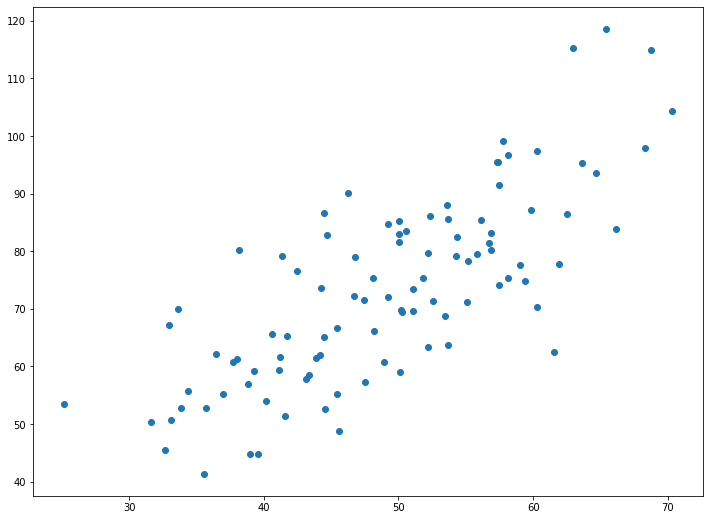

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('/content/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [2]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 300000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.3086537317574174 8.822464803204838


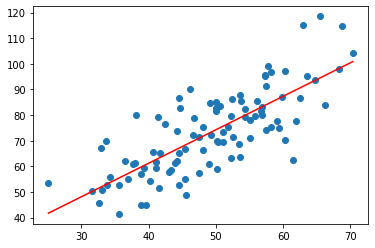

In [3]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('/content/data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1) # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
LR = LinearRegression()
LR.fit(X, Y)
Y_pred =LR.predict(X)

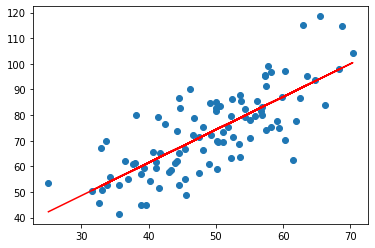

In [6]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [7]:
print(LR.intercept_) # Yintercept
print(LR.coef_) #Slope

[9.90860619]
[[1.28735737]]


# **Excercise 1**
Download the dataset from the following link:
https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw


In [35]:
# Displya first 5 records from the dataset

df= pd.read_csv('/content/student_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
#Display the statistical details of the dataset

df[0: ].describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Independent variable
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Dependent Variable
 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


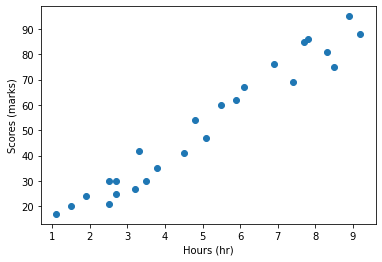

In [56]:
#Split the independent and dependent variables and plot the data

X = df.iloc[:,0].values.reshape(-1, 1)
Y = df.iloc[:,1].values.reshape(-1, 1)
print('Independent variable\n', X)
print('Dependent Variable\n', Y)
plt.scatter(X, Y)
plt.xlabel('Hours (hr)')
plt.ylabel('Scores (marks)')
plt.show()

Explore  Scikit-Learn's built-in [train_test_split() ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method

In [61]:
#Split the data into train and test set :  80% of the data to training set and 20% data to test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print('X training\n', x_train)
print('\n X testing\n', x_test)
print('\n Y training\n', y_train)
print('\n Y testing\n', y_test)

X training
 [[2.5]
 [3.3]
 [3.2]
 [5.1]
 [3.8]
 [1.1]
 [3.5]
 [4.8]
 [9.2]
 [5.5]
 [1.5]
 [2.7]
 [2.7]
 [5.9]
 [7.8]
 [7.4]
 [2.5]
 [8.3]
 [8.5]
 [7.7]]

 X testing
 [[6.1]
 [1.9]
 [4.5]
 [6.9]
 [8.9]]

 Y training
 [[30]
 [42]
 [27]
 [47]
 [35]
 [17]
 [30]
 [54]
 [88]
 [60]
 [20]
 [30]
 [25]
 [62]
 [86]
 [69]
 [21]
 [81]
 [75]
 [85]]

 Y testing
 [[67]
 [24]
 [41]
 [76]
 [95]]


In [62]:
#Train an linear regression model and display the parameters (m,c)

from sklearn import linear_model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("Slope (m): ", lin_reg.coef_)
print("Y intercept (c): ", lin_reg.intercept_)

Slope (m):  [[9.49792159]]
Y intercept (c):  [3.13508028]


Explore sk learn predict method

In [63]:
#Make predictions for the test data

y_pred = lin_reg.predict(x_test)

In [77]:
#Display actual and predicted values

print('X_Value\t\tActual_Value\t  Predicted value')
for i in range(0, y_pred.size):
  print(x_test[i,0], "\t\t", y_test[i,0], "\t\t", y_pred[i,0])


X_Value		Actual_Value	  Predicted value
6.1 		 67 		 61.07240198875215
1.9 		 24 		 21.181131306544952
4.5 		 41 		 45.87572744314941
6.9 		 76 		 68.67073926155352
8.9 		 95 		 87.66658244355695


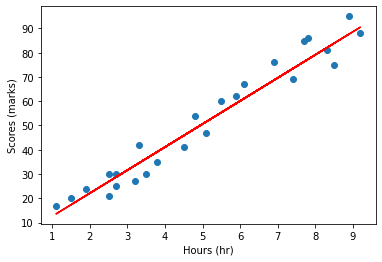

In [82]:
plt.scatter(X, Y)
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, color = 'red')
plt.xlabel('Hours (hr)')
plt.ylabel('Scores (marks)')
plt.show()